- We'll do two examples to illustrate its use for visualization and as a preprocessing step for classification.

- Important Note: PCA is sensitive to the scale of the features. Standardizing the data (mean=0, std=1) is a critical preprocessing step before applying PCA.

#### Example 1: PCA for Visualization (Iris Dataset)

- This example demonstrates how to use PCA to reduce the dimensionality of the Iris dataset (4 features) to 2 principal components, allowing us to visualize the data in 2D and see how well the classes are separated by these components.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Iris Dataset Loaded for PCA Visualization.")
print(f"Original features shape: {X_df.shape}")
print(f"Target names: {target_names}")

Iris Dataset Loaded for PCA Visualization.
Original features shape: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# --- 2. Standardize the Features ---
# PCA is affected by scale, so you need to scale the features before applying PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
print("\nData Scaled (Standardized).")


Data Scaled (Standardized).


In [4]:
# --- 3. Apply PCA ---
# We want to reduce to 2 components for 2D visualization.
n_components_pca = 2
pca_iris = PCA(n_components=n_components_pca, random_state=42)
X_pca_iris = pca_iris.fit_transform(X_scaled)

print(f"\nApplied PCA: Reduced to {n_components_pca} components.")
print(f"Shape of transformed data (X_pca_iris): {X_pca_iris.shape}")



Applied PCA: Reduced to 2 components.
Shape of transformed data (X_pca_iris): (150, 2)


In [5]:
# --- 4. Explained Variance ---
explained_variance_ratio = pca_iris.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print(f"Explained variance by PC1: {explained_variance_ratio[0]:.4f}")
print(f"Explained variance by PC2: {explained_variance_ratio[1]:.4f}")
print(f"Total variance explained by {n_components_pca} components: {cumulative_explained_variance[-1]:.4f}")

# Create a DataFrame for the PCA results for easier plotting with seaborn
pca_iris_df = pd.DataFrame(data=X_pca_iris, columns=['Principal Component 1', 'Principal Component 2'])
pca_iris_df['target'] = y
pca_iris_df['target_names'] = pca_iris_df['target'].apply(lambda x: target_names[x])


Explained variance by PC1: 0.7296
Explained variance by PC2: 0.2285
Total variance explained by 2 components: 0.9581


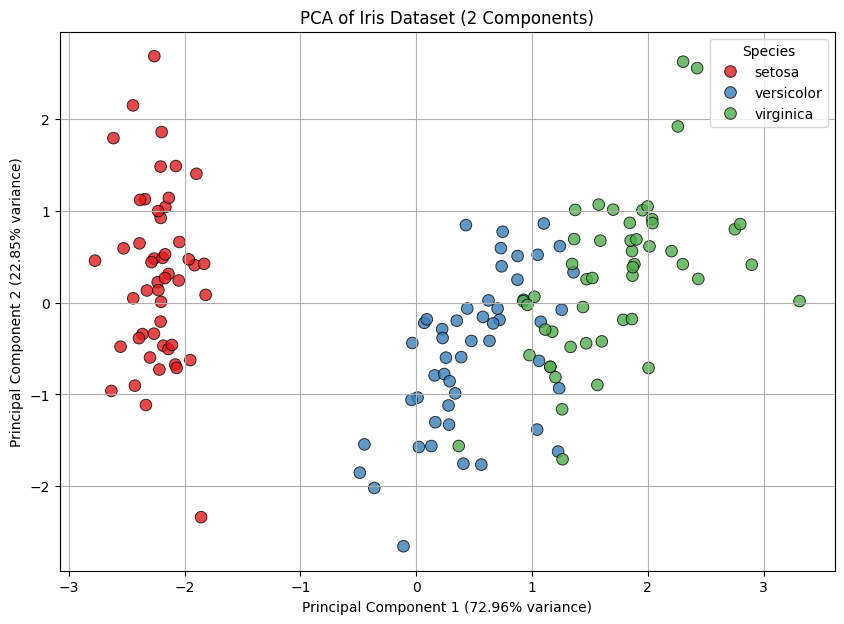

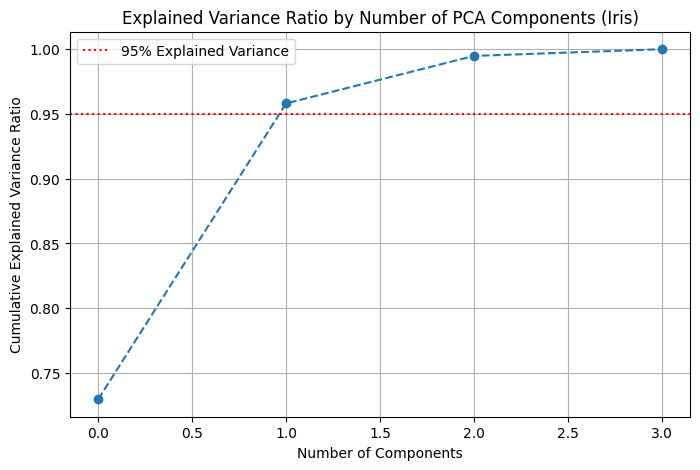

In [7]:
# 5. Visualize the 2D PCA-transformed Data ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target_names',
                palette=sns.color_palette("Set1", n_colors=len(target_names)),
                data=pca_iris_df, s=70, alpha=0.8, edgecolor='k')
plt.title(f'PCA of Iris Dataset ({n_components_pca} Components)')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

# --- Optional: Plot Explained Variance Ratio ---
plt.figure(figsize=(8, 5))
pca_full = PCA(random_state=42) # Fit PCA with all components to see full spectrum
pca_full.fit(X_scaled)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of PCA Components (Iris)')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance') # Example threshold
plt.legend()
plt.show()


**Discussion for Iris PCA Visualization Example:**

- Scaling: StandardScaler is applied first.
- PCA Application: PCA(n_components=2) reduces the 4 original features to 2 principal components.
- Explained Variance: You'll see how much variance each of the two components captures. For Iris, PC1 usually captures a very large portion, and PC1+PC2 together capture a significant majority (often >95%).
- Visualization: The 2D scatter plot of Principal Component 1 vs. Principal Component 2 will show the Iris samples. You should observe that the classes (Setosa, Versicolor, Virginica) are fairly well separated even in this 2D PCA projection, especially Setosa from the other two. This demonstrates PCA's ability to find lower-dimensional representations that preserve class separability.
- The cumulative explained variance plot helps decide how many components to keep if the goal was general dimensionality reduction rather than just 2D visualization.

---

#### Example 2: PCA as a Preprocessing Step for Classification (Breast Cancer Dataset)

- This example demonstrates using PCA to reduce dimensionality before feeding the data to a classifier (Logistic Regression in this case) and compares its performance with a classifier trained on the original full-feature set.

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline # Useful for chaining steps
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for PCA + Classification.")
print(f"Original features shape: {X_df.shape}") # 30 features


Breast Cancer Dataset Loaded for PCA + Classification.
Original features shape: (569, 30)


In [10]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
# --- 3. Model 1: Logistic Regression on Original (Scaled) Full Features ---
print("\n--- Model 1: Logistic Regression on Original Scaled Features ---")
# Create a pipeline for scaling and then logistic regression
pipe_full_features = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42, max_iter=200))
])
pipe_full_features.fit(X_train, y_train)
y_pred_full = pipe_full_features.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy with all {X_train.shape[1]} features: {accuracy_full:.4f}")
# print("\nClassification Report (Full Features):")
# print(classification_report(y_test, y_pred_full, target_names=target_names))



--- Model 1: Logistic Regression on Original Scaled Features ---
Accuracy with all 30 features: 0.9883


In [12]:
# --- 4. Model 2: Logistic Regression on PCA-transformed Features ---
print("\n--- Model 2: Logistic Regression on PCA-transformed Features ---")
# First, determine a good number of components.
# Let's aim for a certain percentage of explained variance, e.g., 95%.
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train) # Scale training data

pca_temp = PCA(random_state=42)
pca_temp.fit(X_train_scaled_pca) # Fit PCA on scaled training data

cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
n_components_95_variance = np.argmax(cumulative_variance >= 0.95) + 1 # +1 because argmax is 0-indexed
print(f"Number of components to explain at least 95% variance: {n_components_95_variance}")



--- Model 2: Logistic Regression on PCA-transformed Features ---
Number of components to explain at least 95% variance: 10


In [13]:
# Now create a pipeline with scaling, PCA, and logistic regression
pipe_pca_features = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_95_variance, random_state=42)),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42, max_iter=200))
])
pipe_pca_features.fit(X_train, y_train)
y_pred_pca = pipe_pca_features.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with {n_components_95_variance} PCA components (explaining >=95% variance): {accuracy_pca:.4f}")
# print("\nClassification Report (PCA Features):")
# print(classification_report(y_test, y_pred_pca, target_names=target_names))


Accuracy with 10 PCA components (explaining >=95% variance): 0.9708


In [14]:
# Let's try with a fixed smaller number of components, e.g., 5 or 10, to see impact
for n_comp_fixed in [2, 5, 10]:
    if n_comp_fixed < X_train.shape[1]: # Ensure n_components is less than original features
        pipe_pca_fixed = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_comp_fixed, random_state=42)),
            ('logreg', LogisticRegression(solver='liblinear', random_state=42, max_iter=200))
        ])
        pipe_pca_fixed.fit(X_train, y_train)
        y_pred_pca_fixed = pipe_pca_fixed.predict(X_test)
        accuracy_pca_fixed = accuracy_score(y_test, y_pred_pca_fixed)
        explained_var_fixed = np.sum(pipe_pca_fixed.named_steps['pca'].explained_variance_ratio_)
        print(f"Accuracy with {n_comp_fixed} PCA components (explaining {explained_var_fixed*100:.2f}% variance): {accuracy_pca_fixed:.4f}")


Accuracy with 2 PCA components (explaining 64.78% variance): 0.9532
Accuracy with 5 PCA components (explaining 85.82% variance): 0.9766
Accuracy with 10 PCA components (explaining 95.62% variance): 0.9708


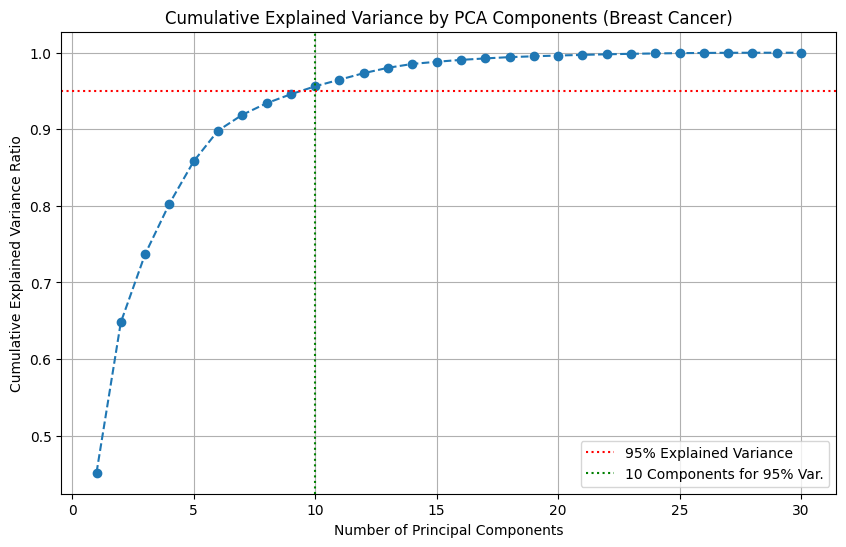

In [15]:
# --- 5. Visualize Cumulative Explained Variance ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by PCA Components (Breast Cancer)')
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.axvline(x=n_components_95_variance, color='g', linestyle=':', label=f'{n_components_95_variance} Components for 95% Var.')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Discussion for Breast Cancer PCA + Classification Example:**

- Pipeline: Using sklearn.pipeline.Pipeline is highly recommended. It ensures that scaling and PCA are fitted only on the training data and then applied consistently to the test data, preventing data leakage.
- Choosing n_components: We first fit PCA on the scaled training data to determine how many components are needed to explain a certain percentage of variance (e.g., 95%). This helps make an informed choice for n_components.
Performance Comparison:
- The accuracy of the logistic regression model trained on the PCA-transformed features (e.g., with components explaining 95% variance) is compared to the accuracy of the model trained on all original (scaled) features.
- Sometimes, using PCA can lead to comparable or even slightly better performance with fewer features, especially if the original dataset had a lot of noise or multicollinearity. It can also significantly speed up training for more complex classifiers.
- If too few components are chosen (capturing too little variance), performance might degrade.
- The plot of cumulative explained variance visually shows the trade-off between the number of components and the amount of information retained.
- These two examples illustrate the primary uses of PCA: visualization and dimensionality reduction as a preprocessing step.Y